In [217]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,classification_report

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix

In [243]:
df = pd.read_csv('ravdess.csv')
X = df.iloc[:,1:-1]
Y = df.iloc[:,-1:]

In [244]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,161
0,0.224306,0.664190,0.693038,0.665390,0.673116,0.696442,0.684787,0.706183,0.748844,0.782297,...,8.778047e-17,6.888786e-17,6.993841e-17,7.601734e-17,7.305700e-17,6.833248e-17,7.254372e-17,7.962737e-17,7.395194e-17,7.358765e-17
1,0.284351,0.744315,0.799083,0.779027,0.777929,0.788401,0.707030,0.673835,0.716503,0.741602,...,5.747496e-06,5.998793e-06,6.341882e-06,6.158174e-06,6.040658e-06,6.382624e-06,6.590600e-06,6.014139e-06,6.107160e-06,5.836667e-06
2,0.169383,0.579495,0.662042,0.674849,0.631609,0.623019,0.687452,0.671907,0.692694,0.712601,...,2.503228e-15,1.885160e-15,1.743947e-15,1.590055e-15,1.477827e-15,1.528373e-15,1.689925e-15,1.679742e-15,1.602365e-15,1.500745e-15
3,0.196533,0.652948,0.692924,0.664361,0.648762,0.686783,0.688136,0.683010,0.735986,0.759067,...,8.858628e-17,7.385022e-17,6.953341e-17,7.445123e-17,7.997667e-17,7.754530e-17,8.110750e-17,7.647289e-17,7.359221e-17,7.287654e-17
4,0.301604,0.760249,0.804322,0.790674,0.760021,0.781235,0.719090,0.647474,0.713795,0.748500,...,3.779440e-05,3.702991e-05,3.877967e-05,3.796563e-05,3.779248e-05,3.834673e-05,3.640969e-05,3.681771e-05,3.691485e-05,3.721758e-05


In [245]:
Y.head()
unq = np.unique(Y)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,161
0,0.224306,0.664190,0.693038,0.665390,0.673116,0.696442,0.684787,0.706183,0.748844,0.782297,...,8.778047e-17,6.888786e-17,6.993841e-17,7.601734e-17,7.305700e-17,6.833248e-17,7.254372e-17,7.962737e-17,7.395194e-17,7.358765e-17
1,0.284351,0.744315,0.799083,0.779027,0.777929,0.788401,0.707030,0.673835,0.716503,0.741602,...,5.747496e-06,5.998793e-06,6.341882e-06,6.158174e-06,6.040658e-06,6.382624e-06,6.590600e-06,6.014139e-06,6.107160e-06,5.836667e-06
2,0.169383,0.579495,0.662042,0.674849,0.631609,0.623019,0.687452,0.671907,0.692694,0.712601,...,2.503228e-15,1.885160e-15,1.743947e-15,1.590055e-15,1.477827e-15,1.528373e-15,1.689925e-15,1.679742e-15,1.602365e-15,1.500745e-15
3,0.196533,0.652948,0.692924,0.664361,0.648762,0.686783,0.688136,0.683010,0.735986,0.759067,...,8.858628e-17,7.385022e-17,6.953341e-17,7.445123e-17,7.997667e-17,7.754530e-17,8.110750e-17,7.647289e-17,7.359221e-17,7.287654e-17
4,0.301604,0.760249,0.804322,0.790674,0.760021,0.781235,0.719090,0.647474,0.713795,0.748500,...,3.779440e-05,3.702991e-05,3.877967e-05,3.796563e-05,3.779248e-05,3.834673e-05,3.640969e-05,3.681771e-05,3.691485e-05,3.721758e-05


In [246]:
print(type(X))
print(type(Y))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [247]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=0,shuffle=True)

In [248]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(3240, 162)
(1080, 162)
(3240, 1)
(1080, 1)


## SVM

In [249]:
from sklearn.svm import SVC

In [250]:
Scaler = StandardScaler()
x_train = Scaler.fit_transform(x_train)
x_test = Scaler.transform(x_test)

In [251]:
Model = SVC(kernel='linear',C=1,probability=True).fit(x_train,np.ravel(y_train))
y_pred = Model.predict(x_test)

<AxesSubplot: >

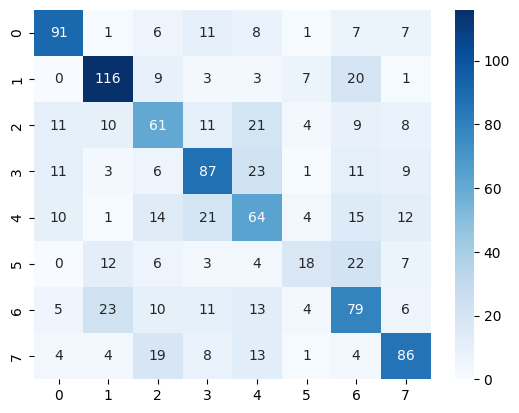

In [252]:
mat = confusion_matrix(y_true=y_test,y_pred=y_pred)
sn.heatmap(mat,annot=True,fmt="0.0f",cmap='Blues')

In [253]:
print("Accuracy: %0.3f" % (accuracy_score(y_test,y_pred)))
print('Recall: %.3f' % recall_score(y_test, y_pred,average='micro'))
print('Precision: %.3f' % precision_score(y_test, y_pred,average='micro'))

Accuracy: 0.557
Recall: 0.557
Precision: 0.557


## Random Foreset

In [254]:
from sklearn.ensemble import RandomForestClassifier

In [255]:
classifier = RandomForestClassifier(n_estimators = 100, random_state = 0) 
classifier.fit(x_train, np.ravel(y_train))   

RandomForestClassifier(random_state=0)

In [256]:
y_pred = classifier.predict(x_test)

In [257]:
print("Accuracy: %0.3f" % (accuracy_score(y_test,y_pred)))
print('Recall: %.3f' % recall_score(y_test, y_pred,average='micro'))
print('Precision: %.3f' % precision_score(y_test, y_pred,average='micro'))

Accuracy: 0.706
Recall: 0.706
Precision: 0.706


<AxesSubplot: >

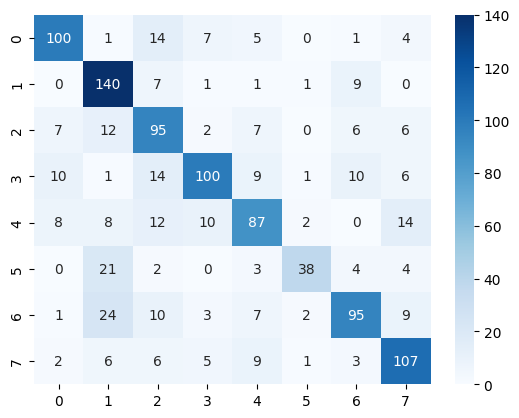

In [258]:
mat = confusion_matrix(y_true=y_test,y_pred=y_pred)
sn.heatmap(mat,annot=True,fmt="0.0f",cmap='Blues')

## MLP

In [259]:
from sklearn.neural_network import MLPClassifier

In [260]:
Model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)
Model.fit(x_train,np.ravel(y_train))
y_pred=Model.predict(x_test)

In [261]:
print("Accuracy: %0.3f" % (accuracy_score(y_test,y_pred)))
print('Recall: %.3f' % recall_score(y_test, y_pred,average='micro'))
print('Precision: %.3f' % precision_score(y_test, y_pred,average='micro'))

Accuracy: 0.740
Recall: 0.740
Precision: 0.740


In [262]:
import pickle
filename = 'mlp_model.sav'
pickle.dump(Model, open(filename, 'wb'))

## CNN

In [189]:
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

In [ ]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 163, 1), (3240, 1), (1080, 163, 1), (1080, 1))

In [200]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_28 (Conv1D)          (None, 163, 256)          1536      
                                                                 
 max_pooling1d_28 (MaxPoolin  (None, 82, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_29 (Conv1D)          (None, 82, 256)           327936    
                                                                 
 max_pooling1d_29 (MaxPoolin  (None, 41, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_30 (Conv1D)          (None, 41, 128)           163968    
                                                                 
 max_pooling1d_30 (MaxPoolin  (None, 21, 128)         

In [213]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50


ValueError: in user code:

    File "C:\Python310\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Python310\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Python310\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Python310\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Python310\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\Python310\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Python310\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Python310\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Python310\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Python310\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 8) are incompatible
